In [141]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm
from scipy.stats import chi2
from scipy import constants

#Graphing variables
pagewidth = (8.5, 5)
colours = ['#ff6868', '#fffc68', '#68ff9d', '#70c3ff', '#db70ff']

In [142]:
#Function definitions

''' Plots the distributions of data as a histogram against the gaussian distribution with mean and stddev matching
    that of the data. 
'''
def plot_distribution(data, filename, title, figsize=pagewidth, bins='sturges', hrange=(-100, 100), 
                      directory='graphs/distributions/', logmode=False):
    plt.figure(figsize=figsize)
    if (hrange == (-100, 100)): hrange = (min(data), max(data))
    gspace = np.linspace(hrange[0], hrange[1], 1000)
    gnorm = norm.pdf(gspace, loc=np.mean(data), scale=np.std(data))
    if type(bins) is str: bins = len(np.histogram_bin_edges(data, bins=bins)) - 1
    gnorm *= 1000 * len(data) / (sum(gnorm) * bins)
    plt.plot(gspace, gnorm, color=colours[4], label='Normal Distribution')
    plt.hist(data, bins=bins, range=hrange, facecolor=colours[3], alpha=0.8, label='ADC Distribution')
    plt.xlabel('ADC Reading (bits)')
    plt.ylabel('Number of Samples')
    if logmode: plt.yscale('log')
    plt.title('Distribution of Data, with frequency '+title+', # bins='+str(bins))
    plt.legend()
    plt.savefig(directory+filename+'.png', bbox_inches='tight')

''' Sums n adjacent samples together in list data and returns a new list of size len(data)/n. 
    n should be a factor of len(data).
'''
def sum_adjacent(data, n):
    return np.sum(data.reshape(int(len(data)/n), -1), axis=1)

In [143]:
%%time
#CPU times: user 380 ms, sys: 442 ms, total: 822 ms Wall time: 11.4 s
#CPU times: user 1.31 s, sys: 3.61 s, total: 4.91 sWall time: 40 s (just loading two sets)

#Load data, subtract mean
#Ended up being much faster this way then using an array

room_uhf = np.fromfile('newdata/room_UHF_100m.dat', dtype='int16')-2.**11 
room_uhf -= np.mean(room_uhf)
room_fm = np.fromfile('newdata/room_FM_100m.dat', dtype='int16')-2.**11 
room_fm -= np.mean(room_fm)
room_lte = np.fromfile('newdata/room_LTE_100m.dat', dtype='int16')-2.**11 
room_lte -= np.mean(room_lte)
boiling = np.fromfile('newdata/boiling.dat', dtype='int16')-2.**11 
boiling -= np.mean(boiling)
ice = np.fromfile('newdata/ice.dat', dtype='int16')-2.**11 
ice -= np.mean(ice)
dry_ice = np.fromfile('newdata/dry_ice.dat', dtype='int16')-2.**11 
dry_ice -= np.mean(dry_ice)
liquid_nitrogen = np.fromfile('newdata/liquid_nitrogen.dat', dtype='int16')-2.**11 
liquid_nitrogen -= np.mean(liquid_nitrogen)

CPU times: user 3.89 s, sys: 9.29 s, total: 13.2 s
Wall time: 3min 10s


In [144]:
#Title strings for graphing
filenames = ['room_UHF_100m', 'room_FM_100m', 'room_LTE_100m', 
             'boiling', #'boiling2', 'boiling3', 'boiling4',
             'ice', 'dry_ice', 'liquid_nitrogen']
titles = ['1GHz @21.9$^\circ$ C', '100MHz @21.9$^\circ$ C', '720MHz @21.9$^\circ$ C', 
          '1GHz @87.2$^\circ$ C', #'1GHz @77.1$^\circ$ C', '1GHz @61.8$^\circ$ C', '1GHz @56.6$^\circ$ C', 
          '1GHz @0.8$^\circ$ C', '1GHz @-78.5$^\circ$ C', '1GHz @-195.8$^\circ$ C']

CPU times: user 2min 18s, sys: 9.99 s, total: 2min 28s
Wall time: 4min 1s


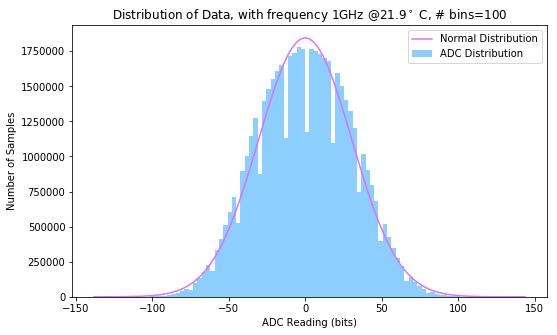

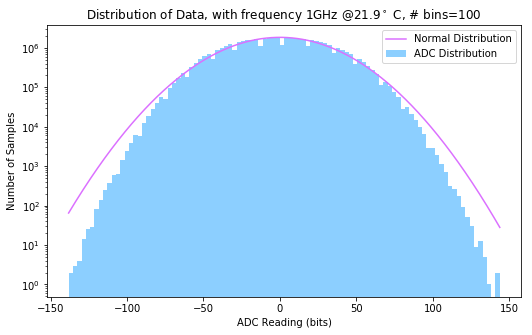

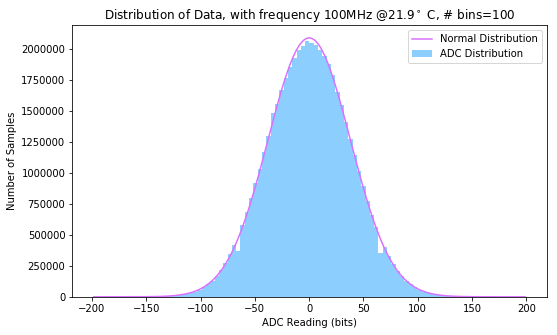

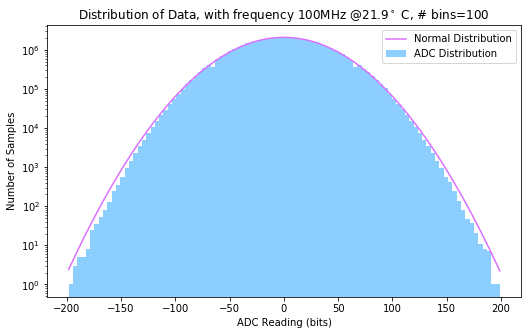

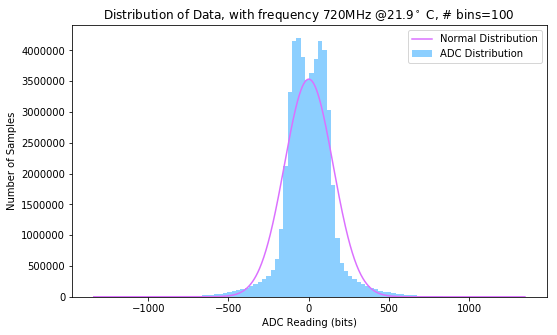

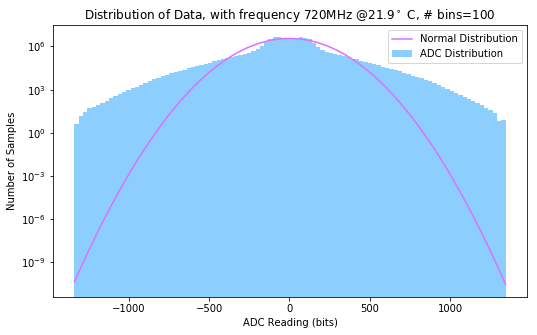

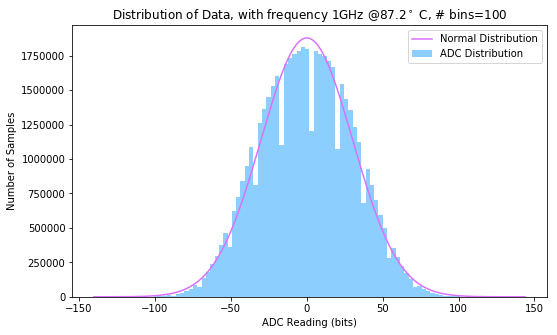

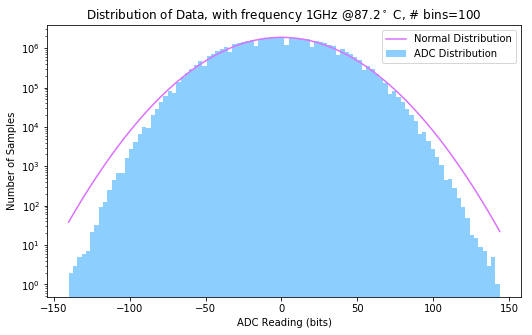

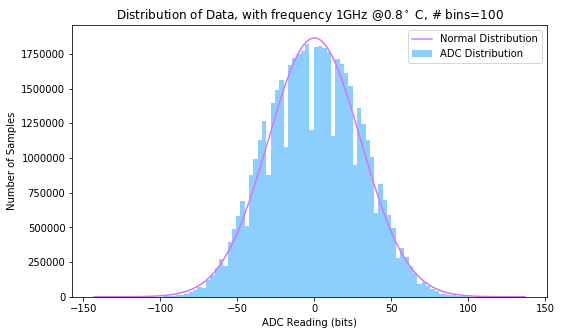

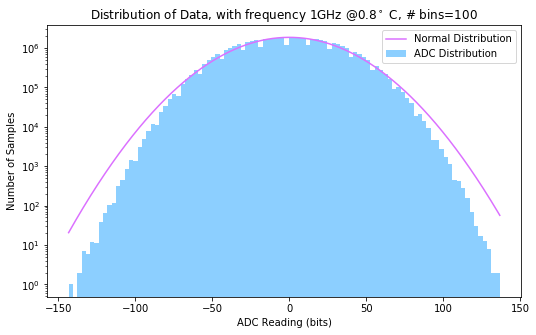

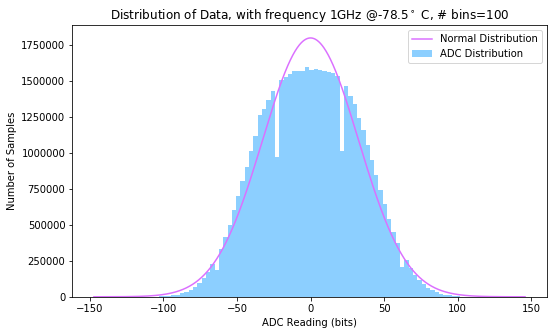

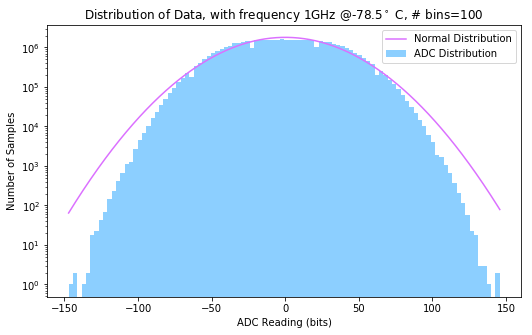

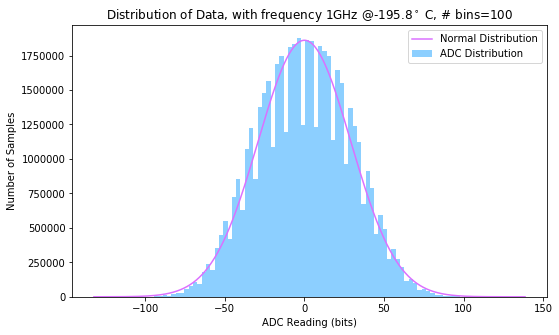

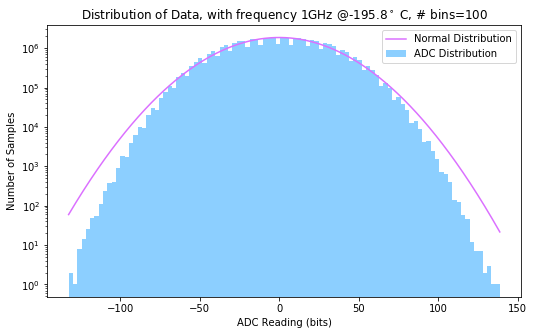

In [145]:
%%time
#CPU times: user 19.6 s, sys: 615 ms, total: 20.2 s Wall time: 19.8 s

#Distribution graphs
plot_distribution(room_uhf[50000000:], filenames[0], titles[0], bins=100)
plot_distribution(room_uhf[50000000:], filenames[0]+'log-y', titles[0], logmode=True, bins=100)

plot_distribution(room_fm[50000000:], filenames[1], titles[1], bins=100)
plot_distribution(room_fm[50000000:], filenames[1]+'log-y', titles[1], logmode=True, bins=100)

plot_distribution(room_lte[50000000:], filenames[2], titles[2], bins=100)
plot_distribution(room_lte[50000000:], filenames[2]+'log-y', titles[2], logmode=True, bins=100)

plot_distribution(boiling[50000000:], filenames[3], titles[3], bins=100)
plot_distribution(boiling[50000000:], filenames[3]+'log-y', titles[3], logmode=True, bins=100)

plot_distribution(ice[50000000:], filenames[4], titles[4], bins=100)
plot_distribution(ice[50000000:], filenames[4]+'log-y', titles[4], logmode=True, bins=100)

plot_distribution(dry_ice[50000000:], filenames[5], titles[5], bins=100)
plot_distribution(dry_ice[50000000:], filenames[5]+'log-y', titles[5], logmode=True, bins=100)

plot_distribution(liquid_nitrogen[50000000:], filenames[6], titles[6], bins=100)
plot_distribution(liquid_nitrogen[50000000:], filenames[6]+'log-y', titles[6], logmode=True, bins=100)

In [146]:
%%time
#CPU times: user 286 ms, sys: 240 ms, total: 525 ms Wall time: 525 ms
#CPU times: user 482 ms, sys: 1.83 s, total: 2.32 s Wall time: 14.2 s for both sets

#Calculate power lists
constant = constants.epsilon_0 * constants.c / 2
power_uhf = room_uhf**2
power_fm = room_fm**2
power_lte = room_lte**2
power_b = boiling**2
power_ice = ice**2
power_di = dry_ice**2
power_ln = liquid_nitrogen**2

CPU times: user 2.62 s, sys: 22.3 s, total: 25 s
Wall time: 18min 52s


In [153]:
%%time
#CPU times: user 43.2 s, sys: 5.98 s, total: 49.2 s Wall time: 1min 12s

#CPU times: user 39.5 s, sys: 1.53 s, total: 41 s Wall time: 41.7 s
#CPU times: user 1min 1s, sys: 5.79 s, total: 1min 7s Wall time: 1min 35s with norm
#CPU times: user 59.1 s, sys: 2.91 s, total: 1min 1s Wall time: 1min 16s with multiplied by norm
#CPU times: user 54.7 s, sys: 6.83 s, total: 1min 1s Wall time: 2min 25s
#CPU times: user 1min 45s, sys: 8.3 s, total: 1min 54s Wall time: 2min 51s for two graphs

def plot_chi2(power, filename, title, bins=200, samples=100000, directory='graphs/chi2/'):
    num = np.array([1, 2, 4, 10, 100])
    plt.figure(figsize=pagewidth)
    plist, clist = [], []
    space = np.linspace(1,10**6,samples)
    mean, var = np.mean(power), np.std(power)
    for i in range(len(num)): 
        plist.append(sum_adjacent(power, num[i]))
        cnorm = len(plist[i]) * (max(plist[i]) - min(plist[i])) / bins
        clist.append(cnorm * chi2.pdf(space, num[i], loc=0, scale=var**0.96))
    for i in range(len(plist)): 
        plt.hist(plist[i], bins=bins, color=colours[i], alpha=0.3)
        plt.plot(space, clist[i], color=colours[i], label='N='+str(num[i]))
    plt.xlabel('Power Summed over N Samples (bits$^2$)')
    plt.ylabel('Number of Samples')
    plt.xscale('log')
    plt.yscale('log')
    plt.xlim((7*10**1, 4*10**5))
    plt.ylim((10**2, 10**8))
    plt.title('ADC Power Data vs $\chi^2$ Distributions, frequency='+title)
    plt.legend()
    plt.savefig(directory+filename+'.png', bbox_inches='tight')

CPU times: user 7 µs, sys: 0 ns, total: 7 µs
Wall time: 10 µs


In [ ]:
plot_chi2(power_uhf, filenames[0], titles[0])
plot_chi2(power_fm, filenames[1], titles[1])
plot_chi2(power_lte, filenames[2], titles[2])
plot_chi2(power_b, filenames[3], titles[3])
plot_chi2(power_i, filenames[4], titles[4])
plot_chi2(power_di, filenames[5], titles[5])
plot_chi2(power_ln, filenames[6], titles[6])

In [156]:
%%time
#CPU times: user 2.34 s, sys: 196 ms, total: 2.54 s Wall time: 2.13 s

def plot_temp(temp, filename, title, directory='graphs/temperatures/'):
    plt.figure(figsize=pagewidth)
    plt.scatter(np.linspace(0,20,len(temp)), temp, color=colours[4], s=1.5**2)
    plt.xlabel('Time(s)')
    plt.ylabel('System Temperature (bits$^2$)')
    plt.yscale('log')
    plt.title('System Temperature Estimate vs Time, frequency='+title)
    plt.savefig(directory+filename+'.png', bbox_inches='tight')

def print_stats(temp, title):
    cadence = 1/(5*10**6)
    time = 20
    mean, std = np.mean(temp), np.std(temp)
    print(title,'stats')
    print('mean',mean)
    print('std',std)
    print('time',time)
    print('bandwidth',1/(500*10**12))
    print('ratio',1/np.sqrt(time/(2*cadence)))
    print('ratio observed',std/mean)
    print()

def mean_square_adjacent(data, n):
    return np.mean(data.reshape(int(len(data)/n), -1)**2, axis=1)

CPU times: user 20 µs, sys: 17 µs, total: 37 µs
Wall time: 41 µs


In [ ]:
%%time
n = 1000

temp_uhf = mean_square_adjacent(room_uhf, n)
temp_fm = mean_square_adjacent(room_fm, n)
temp_lte = mean_square_adjacent(room_lte, n)
temp_b = mean_square_adjacent(boiling, n)
temp_i = mean_square_adjacent(ice, n)
temp_di = mean_square_adjacent(dry_ice, n)
temp_ln = mean_square_adjacent(liquid_nitrogen, n)

In [ ]:
plot_temp(temp_uhf, filenames[0], titles[0])

In [ ]:
plot_temp(temp_uhf, filenames[0], titles[0])
plot_temp(temp_fm, filenames[1], titles[1])
plot_temp(temp_lte, filenames[2], titles[2])
plot_temp(temp_b, filenames[3], titles[3])
plot_temp(temp_i, filenames[4], titles[4])
plot_temp(temp_di, filenames[5], titles[5])
plot_temp(temp_ln, filenames[6], titles[6])

In [ ]:
tmean, tstd = [], []
tmean.append(np.mean(temp_uhf))
tmean.append(np.mean(temp_fm))
tmean.append(np.mean(temp_lte))
tmean.append(np.mean(temp_b))
tmean.append(np.mean(temp_i))
tmean.append(np.mean(temp_di))
tmean.append(np.mean(temp_ln))
tstd.append(np.std(temp_uhf))
tstd.append(np.std(temp_fm))
tstd.append(np.std(temp_lte))
tstd.append(np.std(temp_b))
tstd.append(np.std(temp_i))
tstd.append(np.std(temp_di))
tstd.append(np.std(temp_ln))

print_stats(temp_fm, titles[1])
print_stats(temp_di, titles[5])

In [ ]:
n = 100000

temp_uhf = mean_square_adjacent(room_uhf, n)
temp_fm = mean_square_adjacent(room_fm, n)
temp_lte = mean_square_adjacent(room_lte, n)
temp_b = mean_square_adjacent(boiling, n)
temp_i = mean_square_adjacent(ice, n)
temp_di = mean_square_adjacent(dry_ice, n)
temp_ln = mean_square_adjacent(liquid_nitrogen, n)

plt.figure(figsize=pagewidth)
plt.scatter(np.linspace(0,20,len(temp_uhf)), temp_uhf, color=colours[0], s=1.5**2, label=titles[0])
plt.scatter(np.linspace(0,20,len(temp_fm)), temp_fm, color=colours[1], s=1.5**2, label=titles[1])
plt.scatter(np.linspace(0,20,len(temp_lte)), temp_lte, color=colours[2], s=1.5**2, label=titles[2])
plt.scatter(np.linspace(0,20,len(temp_b)), temp_b, color=colours[3], s=1.5**2, label=titles[3])
plt.scatter(np.linspace(0,20,len(temp_i)), temp_i, color=colours[4], s=1.5**2, label=titles[4])
plt.scatter(np.linspace(0,20,len(temp_di)), temp_di, color=colours[5], s=1.5**2, label=titles[5])
plt.scatter(np.linspace(0,20,len(temp_ln)), temp_ln, color=colours[6], s=1.5**2, label=titles[6])
plt.xlabel('Time(s)')
plt.ylabel('System Temperature (bits$^2$)')
plt.yscale('log')
plt.title('System Temperature Estimate vs Time, frequency='+title)
plt.savefig(directory+filename+'.png', bbox_inches='tight')

1024
20000
CPU times: user 9.52 s, sys: 13.6 s, total: 23.1 s
Wall time: 1min 52s


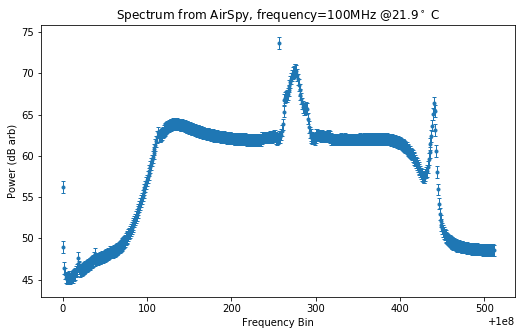

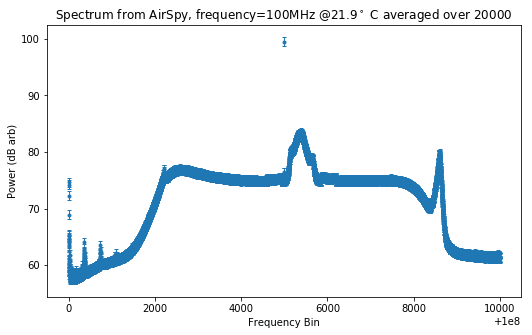

In [93]:
%%time
#CPU times: user 8.79 s, sys: 10 s, total: 18.8 s Wall time: 36.8 s

def find_power2(n):
    i = 0
    while (2**i < n): i += 1
    return 2**(i-1)

def plot_spectrum(data, filename, title, directory='graphs/spectrums/', plot_error=False, u=None, averages=None):
    if not averages: transform = np.fft.fft(data[int(len(data) - find_power2(len(data))):].reshape(-1,1024), axis=1)
    else:
        #avg_data = sum_adjacent(data, averages)/averages
        avg_data = data.reshape(int(len(data)/averages),-1)
        transform = np.fft.fft(avg_data, axis=1)
    t_power = np.mean((transform.real**2 + transform.imag**2), axis=0)
    print(len(t_power))
    plt.figure(figsize=pagewidth)
    half_len = int(len(t_power)/(2))
    if plot_error: plt.errorbar(np.arange(half_len)+100*10**6, 10*np.log10(t_power[:half_len]), yerr=u, 
                                elinewidth=1.0, capthick=1.0, capsize=2.0, fmt='.')
    else: plt.scatter(np.arange(half_len)+100*10**6,10*np.log10(t_power[:half_len]), s=1.5**2)
    plt.xlabel('Frequency Bin')
    plt.ylabel('Power (dB arb)')
    plt.title('Spectrum from AirSpy, frequency='+title)
    plt.savefig(directory+filename+'.png', bbox_inches='tight')

mean = np.mean(temp_fm)
ratio = 1/np.sqrt(20*1/(2*cadence))
num_needed = len(room_fm)/(2/0.01**2)

plot_spectrum(room_fm, filenames[1], titles[1], plot_error=True, u=0.7)
plot_spectrum(room_fm, filenames[1]+'avg', titles[1]+' averaged over 20000', plot_error=True, u=0.8, averages=20000)
#plot_spectrum(room_fm, filenames[1], titles[1], plot_error=True, u=1.1)
#plot_spectrum(dry_ice, filenames[1], titles[1], plot_error=True, u=1.1)

In [ ]:
def linear(x, a, b):
    return a*x + b

def p0(x, y, n):
    return (n * np.sum(x - y) - (np.sum(x) * np.sum(y)))/(n * np.sum(x**2) - np.sum(x)**2)

def p1(x, y, n):
    return 1/n * (np.sum(y) - p0(x, y, n) * np.sum(x))

